In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#一.宏观市场分析 
#（一）一级市场容量分析

数据处理

In [2]:
wxtz=pd.read_excel('D:/data2018/驱虫剂市场/电蚊香套装市场近三年交易额.xlsx')
ff=pd.read_excel('D:/data2018/驱虫剂市场/防霉防蛀片市场近三年交易额.xlsx')
mssc=pd.read_excel('D:/data2018/驱虫剂市场/灭鼠杀虫剂市场近三年交易额.xlsx')
wx=pd.read_excel('D:/data2018/驱虫剂市场/盘香灭蟑香蚊香盘市场近三年交易额.xlsx')
jrp=pd.read_excel('D:/data2018/驱虫剂市场/蚊香加热器市场近三年交易额.xlsx')
wxp=pd.read_excel('D:/data2018/驱虫剂市场/蚊香片市场近三年交易额.xlsx')
wxy=pd.read_excel('D:/data2018/驱虫剂市场/蚊香液市场近三年交易额.xlsx')

In [3]:
wxsc=wxtz
for x in [ff,mssc,wx,jrp,wxp,wxy]:
    wxsc=pd.merge(wxsc,x,on='时间')
wxsc.columns=['时间','电蚊香套装','防霉防蛀片','灭鼠杀虫剂','盘香灭蟑香蚊香盘','蚊香加热器','蚊香片','蚊香液']
wxsc.set_index('时间',inplace=True)
wxsc['一级市场总销售额']=wxsc.sum(axis=1)


查看一级市场趋势

In [4]:
sns.set()#sns.set() → 整体设置seaborn的主题，调色板，颜色代码等多个样式
pd.set_option('float_format',lambda x:'%.2f'% x)#使得数据保留两位有效数字
plt.rcParams['font.family']=['Arial Unicode MS']#指定默认字体
plt.rcParams['axes.unicode_minus']=False#解决负号问题
plt.style.use('ggplot')

No handles with labels found to put in legend.


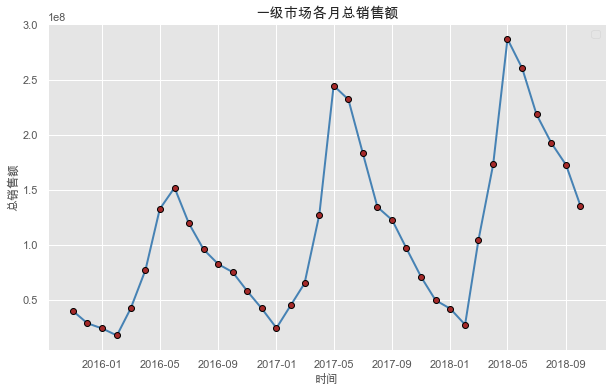

In [6]:
fig=plt.figure(figsize=(10,6))
plt.plot(wxsc.index,wxsc['一级市场总销售额'],linestyle='-',linewidth=2,color='steelblue',marker='o',markeredgecolor='black',markerfacecolor='brown')
plt.title('一级市场各月总销售额')
plt.xlabel('时间')
plt.ylabel('总销售额')
plt.legend()
plt.show()

从图中可以看出销售总额趋势是周期性增长的

观看表格可发下年度数据不完整，缺失2018年11月1日和2018年12月1日的数据，接下来我们就用线性回归对其进行回归，来预测这两个缺失的值

In [14]:
wxsc_1=pd.concat([wxsc['2015-11'],wxsc['2016-11'],wxsc['2017-11']],axis=0)

In [15]:
from sklearn.linear_model import LinearRegression

y_11=[]
for i in wxsc_1.columns:
    x_train=np.array([2015,2016,2017]).reshape(-1,1)
    y_train=wxsc_1[i].values
    x_test=np.array([2018]).round(1).reshape(-1,1)
    clf=LinearRegression()
    clf=clf.fit(x_train,y_train)
    yhat=clf.predict(x_test)
    y_11.append(round(yhat[0],2))
y_11
  

[38692.61,
 6678677.55,
 71752495.99,
 1801318.82,
 193874.39,
 776627.04,
 5543203.83,
 86784890.23]

In [7]:
data=datetime.datetime.strptime('2018-11-1','%Y-%m-%d')#设置一个时间序列指标
y_11=pd.Series(y_11,index=['电蚊香套装','防霉防蛀片','灭鼠杀虫剂','盘香灭蟑香蚊香盘','蚊香加热器','蚊香片','蚊香液','一级市场总销售额'],name=data)
wxsc_1.loc[data,:]=y_11#这里面的data是索引；添加一个索引为2018的行

In [8]:
wxsc_2=pd.concat([wxsc['2015-12'],wxsc['2016-12'],wxsc['2017-12']],axis=0)

In [9]:
y_12=[]
for i in wxsc_2.columns:
    x_train=np.array([2015,2016,2017]).reshape(-1,1)
    y_train=wxsc_2[i].values
    x_test=np.array([[2018]])
    clf=LinearRegression()
    clf=clf.fit(x_train,y_train)
    yhat=clf.predict(x_test)
    y_12.append(round(yhat[0],2))
y_12

[50204.53,
 3958717.58,
 52567630.68,
 928554.26,
 86849.17,
 426812.59,
 3081491.99,
 61100260.79]

In [10]:
data1=datetime.datetime.strptime('2018-12-1','%Y-%m-%d')
y_12=pd.Series(y_12,index=['电蚊香套装','防霉防蛀片','灭鼠杀虫剂','盘香灭蟑香蚊香盘','蚊香加热器','蚊香片','蚊香液','一级市场总销售额'],name=data)
wxsc_2.loc[data1,:]=y_12
wxsc_2

,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,盘香灭蟑香蚊香盘,蚊香加热器,蚊香片,蚊香液,一级市场总销售额
时间,,,,,,,,
2015-12-01,110068.83,2333602.08,24727556.28,818479.56,34076.91,134890.48,583284.49,28741958.63
2016-12-01,84350.57,3504367.98,35466680.56,1234900.05,52118.96,293737.20,1558633.63,42194788.95
2017-12-01,71600.17,3259747.23,42922831.01,796930.46,69145.59,314120.38,2213102.83,49647477.67
2018-12-01,50204.53,3958717.58,52567630.68,928554.26,86849.17,426812.59,3081491.99,61100260.79


In [11]:
wxsc_3=pd.concat([wxsc,wxsc_1,wxsc_2],axis=0)
wxsc_4=wxsc_3.drop_duplicates()
wxsc_4=wxsc_4.sort_index(ascending=False)

（二）二级市场容量分析

In [12]:
total_amount_1=wxsc_4.resample('Y')['一级市场总销售额'].sum()  #resample指的是转化为固定时间频率的序列，这个是转化为年时间序列

No handles with labels found to put in legend.


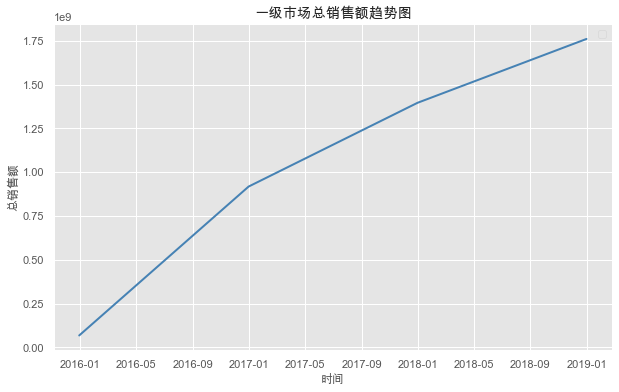

In [13]:
fig=plt.figure(figsize=(10,6))
plt.plot(total_amount_1.index,total_amount_1.values,linestyle='-',linewidth=2,color='steelblue')
plt.title('一级市场总销售额趋势图')
plt.xlabel('时间')
plt.ylabel('总销售额')
plt.legend()
plt.show()

由上图可以看出，2018年相对于2017年全年销售总额增速有所降缓，接下来探寻市场增长点

下面绘制各个驱虫剂三年消费总额折线图

In [16]:
wxsc_5=wxsc_4.resample('Y').sum()

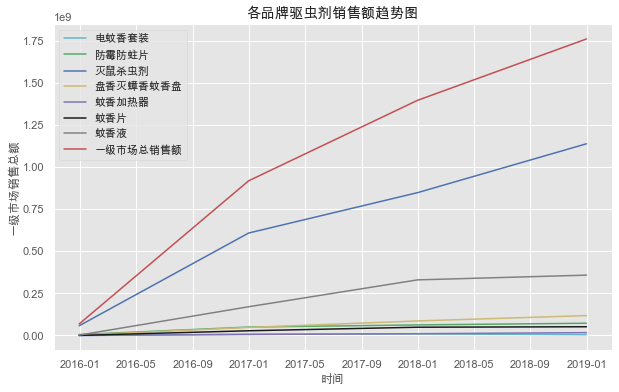

In [17]:
fig=plt.figure(figsize=(10,6))
color=['c','g','b','y','m','k','grey','r']
labels=['电蚊香套装','防霉防蛀片','灭鼠杀虫剂','盘香灭蟑香蚊香盘','蚊香加热器','蚊香片','蚊香液','一级市场总销售额']
for i in np.arange(len(wxsc_5.columns)):
    plt.plot(wxsc_5.index,wxsc_5.iloc[:,i].values,color=color[i],label=labels[i])
plt.title('各品牌驱虫剂销售额趋势图')
plt.xlabel('时间')
plt.ylabel('一级市场销售总额')
plt.legend()
plt.show()

二级市场中灭鼠杀虫剂市场销售额市场最大，增长幅度稳定

（三）二级市场占比分析

In [18]:
ratio=[]
for i in wxsc_5.columns:
    ratios=wxsc_5[i]/wxsc_5['一级市场总销售额']
    ratio.append(ratios)
wxsc_6=pd.DataFrame(ratio,index=wxsc_5.columns)
wxsc_6=wxsc_6.T
wxsc_6#查看二级市场占比

,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,盘香灭蟑香蚊香盘,蚊香加热器,蚊香片,蚊香液,一级市场总销售额
时间,,,,,,,,
2015-12-31,0.00,0.08,0.84,0.03,0.00,0.01,0.03,1.00
2016-12-31,0.01,0.05,0.66,0.05,0.01,0.03,0.19,1.00
2017-12-31,0.01,0.04,0.61,0.06,0.01,0.04,0.24,1.00
2018-12-31,0.00,0.04,0.65,0.07,0.01,0.03,0.20,1.00


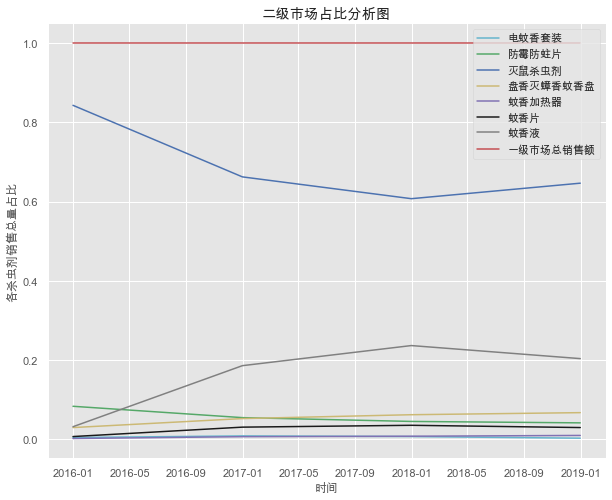

In [19]:
fig=plt.figure(figsize=(10,8))
colors=['c','g','b','y','m','k','grey','r']
labels=['电蚊香套装','防霉防蛀片','灭鼠杀虫剂','盘香灭蟑香蚊香盘','蚊香加热器','蚊香片','蚊香液','一级市场总销售额']
for i in range(len(wxsc_6.columns)):
    plt.plot(wxsc_6.index,wxsc_6.iloc[:,i].values,color=colors[i],label=labels[i])
plt.title('二级市场占比分析图')
plt.xlabel('时间')
plt.ylabel('各杀虫剂销售总量占比')
plt.legend(loc='upper right')
plt.show()#对二级市场占比进行可视化

#从结果可以看出灭鼠剂市场占领一级市场百分之60的市场份额
#其次是蚊香液产品，占据百分之20以上的份额

二级市场增量分析

In [76]:
increase_1=(wxsc_5.iloc[1,:]-wxsc_5.iloc[0,:])/wxsc_5.iloc[0,:]
increase_2=(wxsc_5.iloc[2,:]-wxsc_5.iloc[1,:])/wxsc_5.iloc[1,:]
increase_3=(wxsc_5.iloc[3,:]-wxsc_5.iloc[2,:])/wxsc_5.iloc[2,:]
increase=pd.DataFrame([increase_1,increase_2,increase_3],index=['15-16年增幅','16-17年增幅','17-18年增幅'])
increase
increase1=increase.T#查看二级市场中各增量的方法

In [77]:
increase1

,15-16年增幅,16-17年增幅,17-18年增幅
电蚊香套装,24.97,0.22,-0.52
防霉防蛀片,7.78,0.25,0.16
灭鼠杀虫剂,9.53,0.39,0.34
盘香灭蟑香蚊香盘,22.73,0.80,0.37
蚊香加热器,47.82,0.79,0.60
蚊香片,59.74,0.75,0.06
蚊香液,77.82,0.94,0.09
一级市场总销售额,12.40,0.52,0.26


对上面得到的数据进行可视化

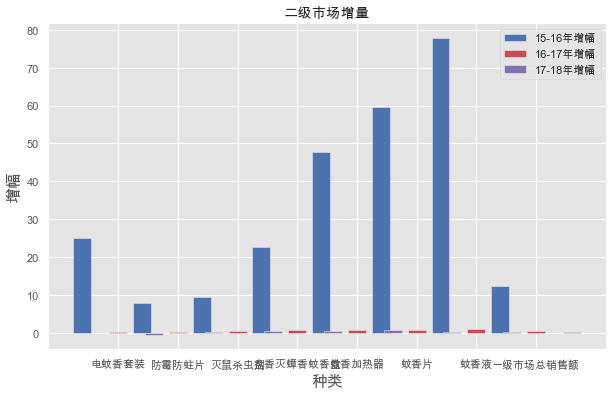

In [78]:
fig,ax = plt.subplots(figsize=(10,6))
width=0.3
x = np.arange(len(increase_1.index))
rects1=ax.bar(x-width*2,increase1['15-16年增幅'],width,color='b',label='15-16年增幅')
rects2=ax.bar(x,increase1['16-17年增幅'],width,color='r',label='16-17年增幅')
rects3=ax.bar(x+width*2,increase1['17-18年增幅'],width,color='m',label='17-18年增幅')
ax.set_ylabel('增幅', fontsize=16)
ax.set_xlabel('种类', fontsize=16)
ax.set_title('二级市场增量')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

从图中可以看出15-16年增幅最大然后增幅放缓，但是15-16年增幅过大，以至于后面两个时间段不明显下面来画一下16-17和17-18年的增幅

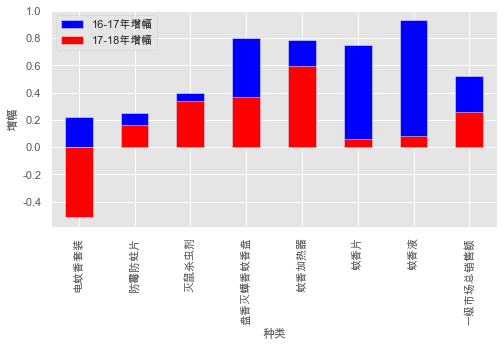

In [79]:
fig=plt.figure(figsize=(8,4))
ax2=increase1['16-17年增幅'].plot(kind='bar',color='blue',label='16-17年增幅')
ax3=increase1['17-18年增幅'].plot(kind='bar',color='red',label='17-18年增幅')
plt.xlabel('种类')
plt.ylabel('增幅')
plt.legend()

从上图可以看出17-18年增幅明显比16-17年增幅慢

（四）竞争分析

In [80]:
brand=pd.read_excel('D:/data2018/top100品牌数据.xlsx')

In [81]:
brand=brand[['品牌','交易指数']]
brand.set_index('品牌',drop=True,inplace=True)
brand

,交易指数
品牌,
PREMISE/拜灭士,530344
科凌虫控,474937
ARS/安速,402372
思乐智,360780
希诺,346656
...,...
BK/帮科,67812
博尔康,66180
无比滴,65779


In [82]:
brand1=brand.head(10)
brand1#选出前十名的产品

,交易指数
品牌,
PREMISE/拜灭士,530344
科凌虫控,474937
ARS/安速,402372
思乐智,360780
希诺,346656
夕姿,319545
皎洁,306651
榄菊,282658
驰天,277965


In [83]:
te1=[]
for i in brand1.values:
    ti=np.round(i/brand1['交易指数'].sum(),4)*100
    te1.append(ti)
brand2=pd.DataFrame(te1,index=brand1.index,columns=['交易指数 %'])
#计算交易指数占比

将上述信息用饼图进行展示，查看各品牌市场占比情况

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


([<matplotlib.patches.Wedge at 0x26ac49a0808>,
 [Text(0.25878103167145894, 2.574770347692984, 'PREMISE/拜灭士'),
  Text(1.4206050802990886, 3.482760973788357, '科凌虫控'),
  Text(2.7006864281753904, 3.271186241813271, 'ARS/安速'),
  Text(3.4199171766880623, 2.3928687381461233, '思乐智'),
  Text(3.4621586633416985, 1.3386394274776654, '希诺'),
  Text(2.930378951085224, 0.4969771963071914, '夕姿'),
  Text(2.0820970220509847, 0.09822261439694602, '皎洁'),
  Text(1.2025539205630194, 0.18176541188695983, '榄菊'),
  Text(0.5080452055753393, 0.6569873976359089, '驰天'),
  Text(0.12442948719201219, 1.3900140775485377, '岭峯')],
 [Text(0.7278476742062321, 2.3389706766559892, '14.8%'),
  Text(1.5360730993384963, 2.9706163295919006, '13.3%'),
  Text(2.426564471774185, 2.8234339073483627, '11.3%'),
  Text(2.9268989055221306, 2.2124304265364336, '10.1%'),
  Text(2.9562842875420516, 1.4790535147670714, '9.7%'),
  Text(2.586350574667982, 0.8935493539528285, '8.9%'),
  Text(1.9962414066441634, 0.6161548621891795, '8.6%'),
  

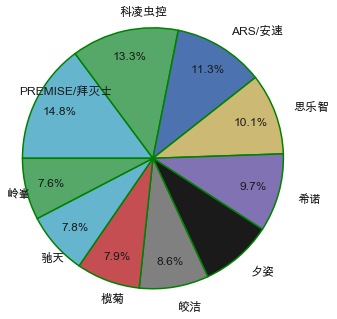

In [84]:
plt.pie(x = brand2, # 绘图数据
        labels=brand2.index, # 添加教育水平标签
        colors=colors, # 设置饼图的自定义填充色
        autopct='%.1f%%', # 设置百分比的格式，这里保留一位小数
        pctdistance=0.8,  # 设置百分比标签与圆心的距离
        labeldistance = 1.15, # 设置教育水平标签与圆心的距离
        startangle = 180, # 设置饼图的初始角度
        radius = 1.5, # 设置饼图的半径
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},# 设置饼图内外边界的属性值
        textprops = {'fontsize':12, 'color':'k'}, # 设置文本标签的属性值
        center = (1.8,1.8) )#是否显示饼图的图框，这里设置显示

二.微观市场分析

将拜耳的灭鼠剂杀剂细分市场进行合并

In [85]:
mm=pd.read_excel('D:/data2018/灭鼠杀虫剂细分市场/螨.xlsx')
ms=pd.read_excel('D:/data2018/灭鼠杀虫剂细分市场/灭鼠.xlsx')
sc=pd.read_excel('D:/data2018/灭鼠杀虫剂细分市场/杀虫.xlsx')
sz=pd.read_excel('D:/data2018/灭鼠杀虫剂细分市场/虱子.xlsx')
zl=pd.read_excel('D:/data2018/灭鼠杀虫剂细分市场/蟑螂.xlsx')

In [86]:
t_1=mm[['类别','预估销售额']]
t_2=ms[['类别','预估销售额']]
t_3=sc[['类别','预估销售额']]
t_4=sz[['类别','预估销售额']]
t_5=zl[['类别','预估销售额']]

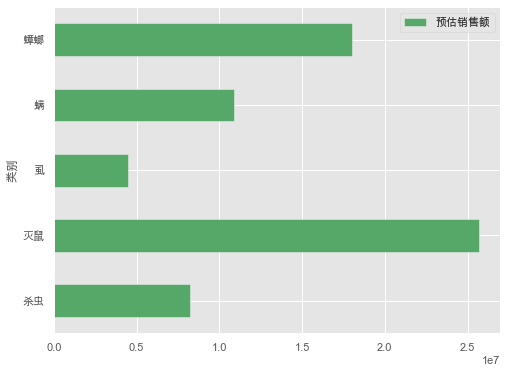

In [87]:
t=pd.concat([t_1,t_2,t_3,t_4,t_5])
t_sum=t.groupby('类别').sum()
t_sum.plot(kind='barh',color='g',figsize=(8,6))

从条形图可以看出，在二级市场内灭鼠产品预估销售额是最大，其次是灭蟑产品，因此拜耳可以主要生产灭鼠和灭蟑的产品

（一）三级市场占比分析

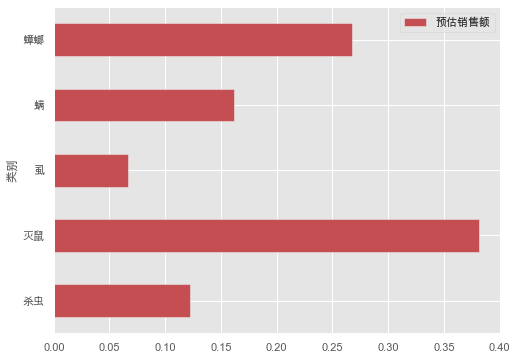

In [88]:
t_sum_total=t.groupby('类别').sum().sum(axis=0)
(t_sum/t_sum_total).plot(kind='barh',color='r',figsize=(8,6))

可以看出拜耳主营业务市场中，灭鼠和灭蟑产品占市场份额60%左右

引流产品价格的定位

In [89]:
ms_2=ms.loc[:,['类别','宝贝ID','售价','预估销售额']]
ms_2.describe()

,宝贝ID,售价,预估销售额
count,1523.00,1523.00,1504.00
mean,465735813792.49,49.02,17078.47
std,203407611515.58,69.76,117232.08
min,1868822063.00,0.01,0.01
25%,528690268447.50,15.80,79.39
50%,560595481143.00,27.70,298.50
75%,573486848491.00,52.60,1924.12
max,582355883649.00,498.00,2672898.00


设置0,50,100,150,200,250,300,350,400,450,500几个价格段

In [90]:
bins_1=[0,50,100,150,200,250,300,350,400,450,500]
labels=['0-50','50-100','100-150','150-200','200-250','250-300','300-350','350-400','400-450','450-500']
ms_2['价格区间']=pd.cut(ms_2['售价'],bins=bins_1,labels=labels)

In [91]:
ms_2.head()

,类别,宝贝ID,售价,预估销售额,价格区间
0,灭鼠,566054780243,26.80,267356.80,0-50
1,灭鼠,566054780243,26.80,267356.80,0-50
2,灭鼠,572115448996,9.90,98455.50,0-50
3,灭鼠,39868408322,29.90,2960.10,0-50
4,灭鼠,520282897220,39.90,3950.10,0-50


In [92]:
ms_2.groupby('价格区间')['预估销售额'].sum().sort_values(ascending=False)

价格区间
0-50      15162086.51
50-100     3335060.19
100-150    2758086.29
200-250    2743758.00
450-500     758696.00
150-200     629813.00
250-300     237740.00
350-400      51584.00
300-350       6680.00
400-450       2508.00
Name: 预估销售额, dtype: float64

可以看出主要销售价格在0-50之间，下面接着进行细分0,10,20,30,40,50这几个价格区间

In [93]:
bins_2=[0,10,20,30,40,50]
labels_1=['0-10','10-20','20-30','30-40','40-50']
ms_2['价格区间_']=pd.cut(ms_2['售价'],bins=bins_2,labels=labels_1)
ms_2.head()

,类别,宝贝ID,售价,预估销售额,价格区间,价格区间_
0,灭鼠,566054780243,26.80,267356.80,0-50,20-30
1,灭鼠,566054780243,26.80,267356.80,0-50,20-30
2,灭鼠,572115448996,9.90,98455.50,0-50,0-10
3,灭鼠,39868408322,29.90,2960.10,0-50,20-30
4,灭鼠,520282897220,39.90,3950.10,0-50,30-40


In [94]:
ms_2.groupby('价格区间_')['预估销售额'].sum().sort_values(ascending=False)

价格区间_
10-20   8102634.14
20-30   4969620.92
30-40   1240874.19
40-50    707568.49
0-10     141388.77
Name: 预估销售额, dtype: float64

因此可以看出拜耳如果想进入灭鼠剂市场价格最好定在0-50之间，而在0-50之间最好定在10-30之间这样不容易亏损 

（二）.竞争分析

In [95]:
安速家居=pd.read_excel('D:/data2018/竞争数据/商品销售数据/安速家居近30天销售数据.xlsx')
科凌虫控=pd.read_excel('D:/data2018/竞争数据/商品销售数据/科凌虫控旗舰店近30天销售数据.xlsx')
拜耳=pd.read_excel('D:/data2018/拜耳店铺数据/拜耳近30天销售数据.xlsx')

首先分析拜耳

In [96]:
baier=拜耳[['商品ID','适用对象','商品售价','30天销售量','30天销售额']]
baier.head()

,商品ID,适用对象,商品售价,30天销售量,30天销售额
0,527604730327,蟑螂,39.90,43542,1737325.80
1,535731556857,蚂蚁,59.90,4860,291114.00
2,530229854741,白蚁,89.90,838,75336.20
3,569753894890,蟑螂,79.90,1487,118811.30
4,549862604116,杀虫剂,39.90,1641,65475.90


Text(0.5, 0, '30天销售额')

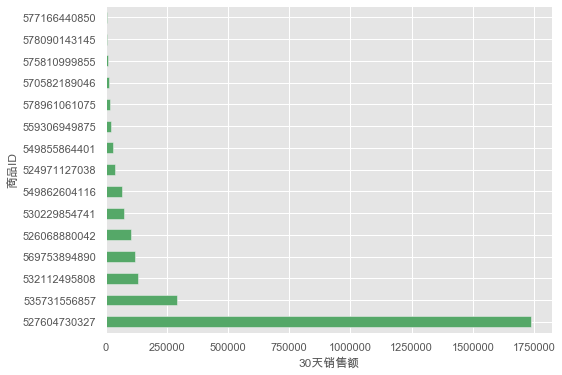

In [97]:
baier_s=baier.groupby('商品ID')['30天销售额'].sum().sort_values(ascending=False)
baier_s.plot(kind='barh',color='g',figsize=(8,6))
plt.xlabel('30天销售额')

可以看出拜耳产品中爆款是527604730327

In [98]:
baier.groupby('适用对象').sum().sort_values('30天销售额',ascending=False)

,商品ID,商品售价,30天销售量,30天销售额
适用对象,,,,
蟑螂,4996641317123,752.40,50691,2181372.30
蚂蚁,1106313745903,173.90,4989,305820.00
杀虫剂,1074833731154,79.80,2593,103460.70
白蚁,530229854741,89.90,838,75336.20
上门服务,578090143145,99.00,74,7326.00


可以看出灭蟑产品占拜耳的销售额最大的比重，其次是灭蚁

然后分析科凌虫控

Text(0.5, 0, '30天销售额')

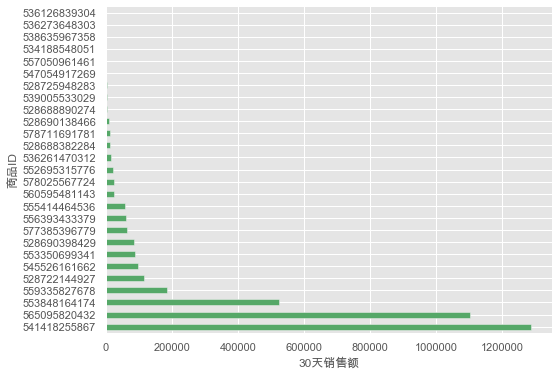

In [99]:
keling=科凌虫控[['商品ID','适用对象','商品售价','30天销售量','30天销售额']]
keling_s=keling.groupby('商品ID')['30天销售额'].sum().sort_values(ascending=False)
keling_s.plot(kind='barh',color='g',figsize=(8,6))
plt.xlabel('30天销售额')

可以看出科凌的爆款产品是541418255867

In [100]:
keling.groupby('适用对象').sum().sort_values('30天销售额',ascending=False)

,商品ID,商品售价,30天销售量,30天销售额
适用对象,,,,
蟑螂,2193692130180,105.50,85785,1525024.20
螨,1143807512213,78.80,36037,1114222.40
鼠,7643582808847,487.60,36319,953394.40
虱,559335827678,25.10,7395,185614.50
其它园艺用品,552695315776,26.00,880,22880.00
蛾,1074897437670,44.30,575,16599.50
虫,1606589035658,118.60,37,2035.00


#热门产品灭蟑销售额与拜耳的差距不大
#科凌的产品类目覆盖了二级市场里面主要的类目

最后分析安速家居

Text(0.5, 0, '30天销售额')

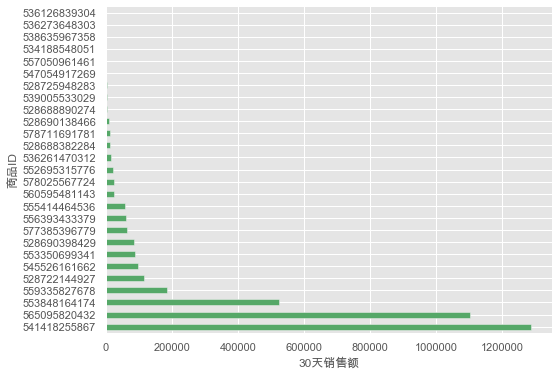

In [101]:
ansu=安速家居[['商品ID','适用对象','商品售价','30天销售量','30天销售额']]
ansu_s=ansu.groupby('商品ID')['30天销售额'].sum().sort_values(ascending=False)
keling_s.plot(kind='barh',color='g',figsize=(8,6))
plt.xlabel('30天销售额')

可以看出安速的爆款产品是54141855867

In [102]:
ansu.groupby('适用对象').sum().sort_values('30天销售额',ascending=False)

,商品ID,商品售价,30天销售量,30天销售额
适用对象,,,,
蟑螂,6446879299188,481.30,6178,268585.30
螨,2820972369214,242.60,3302,164381.30
杀虫剂,4366320607112,349.60,755,34687.50
蚊,5008917391793,425.60,574,24388.60
鼠,1090757908525,76.20,279,12936.60
蝇,564993565252,24.80,515,12772.00
空调清洁剂,1056404562798,113.00,151,10420.90
漱口水,1130081741597,149.80,127,9137.30
空气芳香剂,1620098374783,141.90,118,4668.60


安速的热销产品销售额不及拜耳和科凌，但是安速的产品类很广，产品多样化要更好

三.产品结构分析（利用波士顿矩阵模型进行分析）

（一）拜耳产品结构分析

In [103]:
baier_2=pd.read_excel('D:/data2018/拜耳店铺数据/拜耳全店商品交易数据.xlsx')
baier_str=baier_2.groupby('商品').agg({'交易增长幅度':np.mean,'支付转化指数':np.mean,'交易金额':np.sum})
baier_str['交易金额占比']=baier_str['交易金额']/baier_str['交易金额'].sum()*100
baier_str.head()

,交易增长幅度,支付转化指数,交易金额,交易金额占比
商品,,,,
17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.25,1063.00,42340.55,0.05
德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.12,796.33,197377.17,0.24
德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.22,955.60,1394780.59,1.72
德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.28,751.00,26742.75,0.03
德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.44,266.00,28969.28,0.04


In [104]:
baier_str.describe()

,交易增长幅度,支付转化指数,交易金额,交易金额占比
count,44.00,44.00,44.00,44.00
mean,25.54,1087.55,1839559.52,2.27
std,155.08,330.55,6321049.78,7.81
min,-0.29,266.00,22553.62,0.03
25%,-0.06,824.45,68285.08,0.08
50%,0.11,1132.17,206187.89,0.25
75%,1.29,1317.75,767329.12,0.95
max,1030.00,1749.33,40103850.97,49.55


出现一个异常值就是交易增长幅度最大值那一行，给其删除

In [105]:
baier_str=baier_str[baier_str.交易增长幅度!=1030]

In [106]:
baier_str.describe()#删除后发现不再有异常值

,交易增长幅度,支付转化指数,交易金额,交易金额占比
count,43.00,43.00,43.00,43.00
mean,2.18,1104.82,1881385.42,2.32
std,6.53,313.74,6389693.99,7.89
min,-0.29,266.00,22553.62,0.03
25%,-0.07,865.10,77122.57,0.10
50%,0.07,1133.33,214998.61,0.27
75%,1.17,1323.50,839285.98,1.04
max,31.22,1749.33,40103850.97,49.55


分别将拜耳的明星产品，金牛产品，问题产品，瘦狗产品列出来

In [107]:
明星产品=baier_str.where((baier_str['交易增长幅度']>=baier_str['交易增长幅度'].mean())&(baier_str['交易金额']>=baier_str['交易金额'].mean())).dropna()
金牛产品=baier_str.where((baier_str['交易增长幅度']<=baier_str['交易增长幅度'].mean())&(baier_str['交易金额']>=baier_str['交易金额'].mean())).dropna()
问题产品=baier_str.where((baier_str['交易增长幅度']>=baier_str['交易增长幅度'].mean())&(baier_str['交易金额']<=baier_str['交易金额'].mean())).dropna()
瘦狗产品=baier_str.where((baier_str['交易增长幅度']<=baier_str['交易增长幅度'].mean())&(baier_str['交易金额']<=baier_str['交易金额'].mean())).dropna()

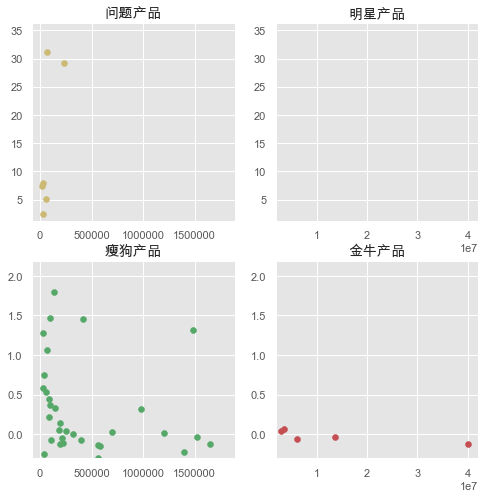

In [108]:
ax=plt.figure(figsize=(8,8))
a=[问题产品,明星产品,瘦狗产品,金牛产品]
b=['问题产品','明星产品','瘦狗产品','金牛产品']
c=['y','b','g','r']
for i in range(len(a)):
    ax.add_subplot(2,2,i+1)
    plt.scatter(a[i].交易金额,a[i].交易增长幅度,c=c[i])
    plt.title(b[i])
    if i==0:
        plt.ylim(baier_str['交易增长幅度'].mean()-1,baier_str['交易增长幅度'].max()+5)
        plt.xlim(baier_str['交易金额'].min()-100000,baier_str['交易金额'].mean()+10000)
    elif i==1:
        plt.ylim(baier_str['交易增长幅度'].mean()-1,baier_str['交易增长幅度'].max()+5)
        plt.xlim(baier_str['交易金额'].mean()-10000,baier_str['交易金额'].max()+2000000)
    elif i==2:
        plt.ylim(baier_str['交易增长幅度'].min()-0.01,baier_str['交易增长幅度'].mean()+0.01)
        plt.xlim(baier_str['交易金额'].min()-100000,baier_str['交易金额'].mean()+10000)
    elif i==3:
        plt.ylim(baier_str['交易增长幅度'].min()-0.01,baier_str['交易增长幅度'].mean()+0.01)
        plt.xlim(baier_str['交易金额'].mean()-10000,baier_str['交易金额'].max()+2000000)
#进行可视化调整每个图表的最大最小行和列，使得对比更加直观

#可以看出拜耳潜力产品较多，需要考虑是否应该投入更多的营销资源取保持增长幅度，使其转化为明星产品和金牛产品
#拜耳的明星产品较少可能因为增长速度缓慢

（二）科凌产品结构分析

In [109]:
keling_2=pd.read_excel('D:/data2018/竞争数据/商品交易数据/科凌虫控全店商品交易数据.xlsx')
keling_str=keling_2.groupby('商品').agg({'交易增长幅度':np.mean,'支付转化指数':np.mean,'交易金额':np.sum})
keling_str['交易金额占比']=keling_str['交易金额']/keling_str['交易金额'].sum()*100
keling_str.head()

,交易增长幅度,支付转化指数,交易金额,交易金额占比
商品,,,,
4 只装驱老鼠夹捕鼠器家用灭鼠神器抓杀扑老鼠夹子捉老鼠笼全自动,0.05,1241.40,289907.35,0.62
去儿童头虱除阴虱净喷剂百部酊虱卵用虱子药成人一扫光净虱灵喷雾,0.67,1601.00,1112790.54,2.39
天然除螨虫包喷雾剂中草药祛防杀去螨虫垫贴床上用品家用驱虫神器,407.98,1309.50,290170.09,0.62
抓老鼠夹子捕鼠器笼家用连续全自动逮捉老鼠笼超强扑鼠笼灭鼠神器,0.07,879.00,51645.49,0.11
抓老鼠贴强力粘鼠板胶药沾灭鼠器捕鼠神器克星家用正品20张一窝端,4.22,1402.33,119948.74,0.26


In [110]:
keling_str.describe()#基本没有异常值

,交易增长幅度,支付转化指数,交易金额,交易金额占比
count,31.00,31.00,31.00,31.00
mean,13.48,1358.03,1500409.78,3.23
std,73.22,318.02,4039568.31,8.68
min,-0.32,801.25,25665.98,0.06
25%,-0.07,1161.20,109973.55,0.24
50%,0.05,1299.67,328698.54,0.71
75%,0.55,1581.50,1138542.42,2.45
max,407.98,2002.50,21966057.02,47.23


In [111]:
明星产品=keling_str.where((keling_str['交易增长幅度']>=keling_str['交易增长幅度'].mean())&(keling_str['交易金额']>=keling_str['交易金额'].mean())).dropna()
金牛产品=keling_str.where((keling_str['交易增长幅度']<=keling_str['交易增长幅度'].mean())&(keling_str['交易金额']>=keling_str['交易金额'].mean())).dropna()
问题产品=keling_str.where((keling_str['交易增长幅度']>=keling_str['交易增长幅度'].mean())&(keling_str['交易金额']<=keling_str['交易金额'].mean())).dropna()
瘦狗产品=keling_str.where((keling_str['交易增长幅度']<=keling_str['交易增长幅度'].mean())&(keling_str['交易金额']<=keling_str['交易金额'].mean())).dropna()

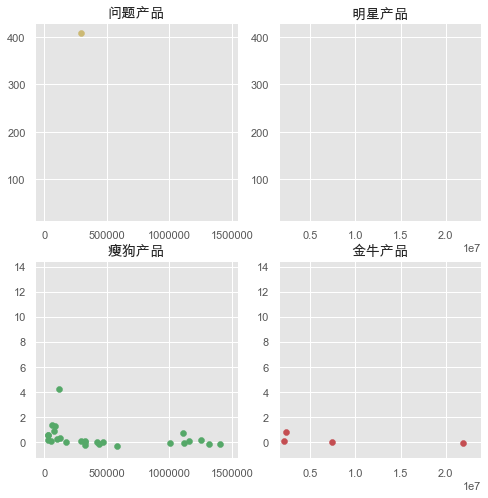

In [112]:
ax=plt.figure(figsize=(8,8))
a=[问题产品,明星产品,瘦狗产品,金牛产品]
b=['问题产品','明星产品','瘦狗产品','金牛产品']
c=['y','b','g','r']
for i in range(len(a)):
    ax.add_subplot(2,2,i+1)
    plt.scatter(a[i].交易金额,a[i].交易增长幅度,c=c[i])
    plt.title(b[i])
    if i==0:
        plt.ylim(keling_str['交易增长幅度'].mean()-1,keling_str['交易增长幅度'].max()+20)
        plt.xlim(keling_str['交易金额'].min()-100000,keling_str['交易金额'].mean()+50000)
    elif i==1:
        plt.ylim(keling_str['交易增长幅度'].mean()-1,keling_str['交易增长幅度'].max()+20)
        plt.xlim(keling_str['交易金额'].mean()-10000,keling_str['交易金额'].max()+2000000)
    elif i==2:
        plt.ylim(keling_str['交易增长幅度'].min()-1,keling_str['交易增长幅度'].mean()+1)
        plt.xlim(keling_str['交易金额'].min()-100000,keling_str['交易金额'].mean()+50000)
    elif i==3:
        plt.ylim(keling_str['交易增长幅度'].min()-1,keling_str['交易增长幅度'].mean()+1)
        plt.xlim(keling_str['交易金额'].mean()-10000,keling_str['交易金额'].max()+2000000)

#科凌的金牛产品明显，灭蟑产品对销售额与拜耳主营业务差距不大
#科凌的产品更加多样化

（三）安速家居结构分析

In [113]:
ansu_2=pd.read_excel('D:/data2018/竞争数据/商品交易数据/安速全店商品交易数据.xlsx')
ansu_str=ansu_2.groupby('商品').agg({'交易增长幅度':np.mean,'支付转化指数':np.mean,'交易金额':np.sum})
ansu_str['交易金额占比']=ansu_str['交易金额']/ansu_str['交易金额'].sum()*100
ansu_str.head()

,交易增长幅度,支付转化指数,交易金额,交易金额占比
商品,,,,
10枚装日本进口安速小强恢恢蟑螂屋诱捕捉器杀药贴环保无毒包邮,0.18,1580.00,217061.51,0.72
✅【10枚装】日本进口安速小强恢恢蟑螂屋捕捉器杀药贴家用全窝端,-0.16,1781.40,812113.82,2.69
【20枚装】日本进口安速小强恢恢蟑螂屋蟑螂捕捉器诱捕器灭蟑小屋,0.93,1513.00,58785.41,0.20
【6枚装】日本安速小强恢恢蟑螂屋捕捉器药厨房灭杀强力家用贴清,0.05,1680.00,33178.59,0.11
冲销量日本安速小黑帽蟑螂屋蟑螂药家用强力灭蟑清安全无毒小强,42.01,1141.00,32034.34,0.11


In [114]:
明星产品=ansu_str.where((ansu_str['交易增长幅度']>=ansu_str['交易增长幅度'].mean())&(ansu_str['交易金额']>=ansu_str['交易金额'].mean())).dropna()
金牛产品=ansu_str.where((ansu_str['交易增长幅度']<=ansu_str['交易增长幅度'].mean())&(ansu_str['交易金额']>=ansu_str['交易金额'].mean())).dropna()
问题产品=ansu_str.where((ansu_str['交易增长幅度']<=ansu_str['交易增长幅度'].mean())&(ansu_str['交易金额']>=ansu_str['交易金额'].mean())).dropna()
瘦狗产品=ansu_str.where((ansu_str['交易增长幅度']<=ansu_str['交易增长幅度'].mean())&(ansu_str['交易金额']<=ansu_str['交易金额'].mean())).dropna()

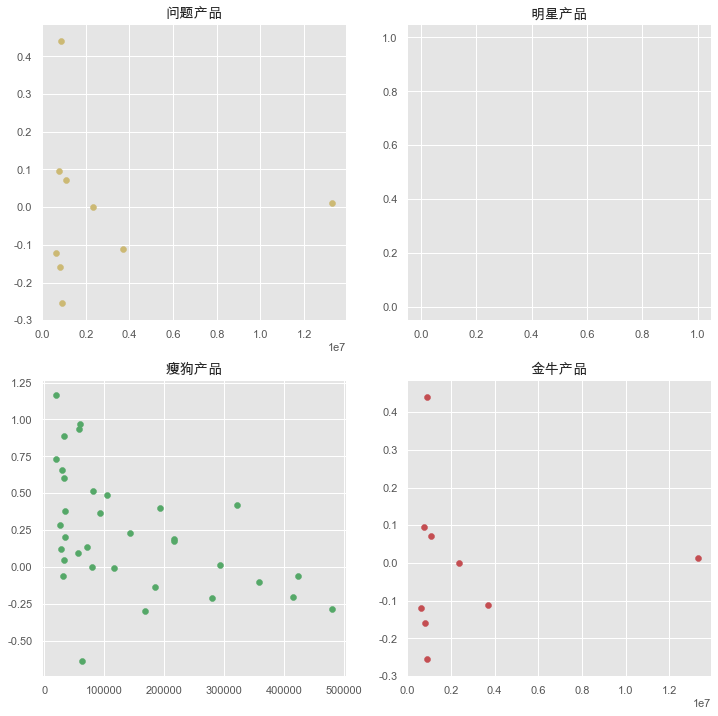

In [115]:
ax=plt.figure(figsize=(12,12))
a=[问题产品,明星产品,瘦狗产品,金牛产品]
b=['问题产品','明星产品','瘦狗产品','金牛产品']
c=['y','b','g','r']
for i in range(len(a)):
    ax.add_subplot(2,2,i+1)
    plt.scatter(a[i].交易金额,a[i].交易增长幅度,c=c[i])
    plt.title(b[i])
#调整最大最小行和列会损失部分数据所以这次没有调整

#安速产品 现金牛产品多，覆盖广
#安速金牛产品和瘦狗产品覆盖了二级市场，跳蚤产品支付热度明显

四.产品流量分析

（一）拜耳流量分析

In [116]:
baier_4=pd.read_excel('D:/data2018/拜耳店铺数据/拜耳官方旗舰店流量渠道.xlsx')
del baier_4['交易指数.1']
baier_4.set_index('流量来源',inplace=True)
baier_4

,交易指数
流量来源,
淘内免费,399466
手淘搜索,336457
淘内免费其他,195308
手淘问大家,123512
手淘旺信,88024
...,...
米折,0
淘粉吧,0
其它来源,0


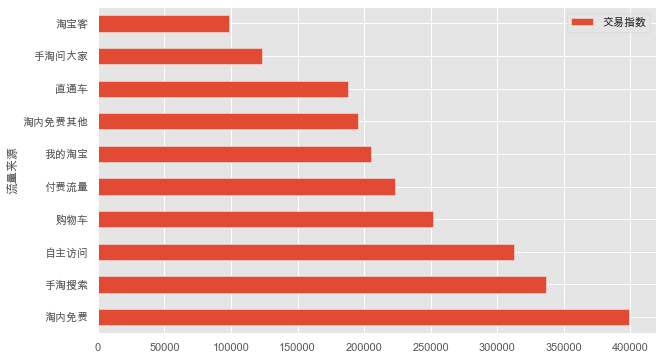

In [117]:
top10=baier_4.sort_values('交易指数',ascending=False)[:10]
top10.plot(kind='barh',figsize=(10,6))

(二)科凌流量分析

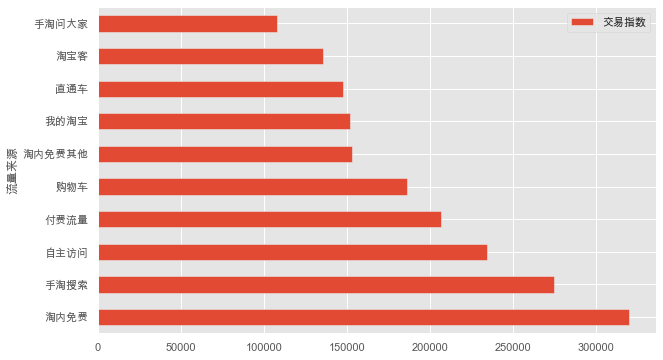

In [118]:
keling_4=pd.read_excel('D:/data2018/竞争数据/流量渠道数据/科凌虫控旗舰店流量渠道.xlsx')
keling_4.set_index('流量来源',inplace=True)
top10=keling_4.sort_values('交易指数',ascending=False)[:10]
top10.plot(kind='barh',figsize=(10,6))

（三）安速流量分析

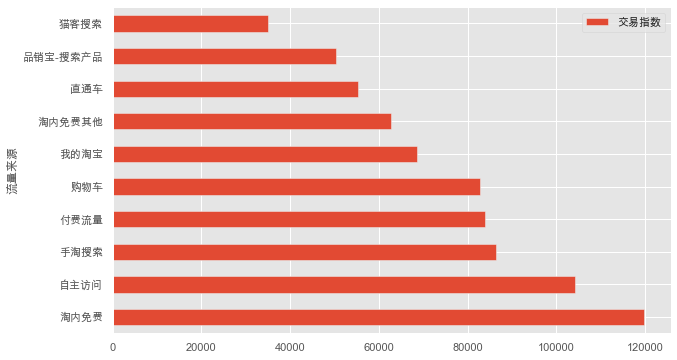

In [119]:
ansu_4=pd.read_excel('D:/data2018/竞争数据/流量渠道数据/安速家居旗舰店流量渠道.xlsx')
ansu_4.set_index('流量来源',inplace=True)
top10=ansu_4.sort_values('交易指数',ascending=False)[:10]
top10.plot(kind='barh',figsize=(10,6))

拜耳的主要竞争对手都不太注重陶内流量服务购买，拜耳可以通过一些付费渠道来增加产品曝光率